In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Predicting Titanic Survival: Insights and Modeling with Data Science

**The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ignore all warning

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [4]:
gen=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
tst=pd.read_csv('/kaggle/input/titanic/test.csv')
trn=pd.read_csv('/kaggle/input/titanic/train.csv')

In [5]:
# Merge the DataFrames
df = pd.concat([trn, tst, gen], ignore_index=True)

# Optionally, save the merged DataFrame to a new CSV file

df.to_csv('merged_data.csv', index=False)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


**set option of rows and colum to maximum**

In [7]:
# maximum column printing option 

pd.set_option('display.max_columns' , None)

# maximum row printing option

pd.set_option('display.max_rows' , None)

# Checking missing values

In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass          418
Name            418
Sex             418
Age             681
SibSp           418
Parch           418
Ticket          418
Fare            419
Cabin          1432
Embarked        420
dtype: int64

In [9]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100


# Display the missing percentages
print(missing_percentage)

PassengerId     0.000000
Survived       24.203822
Pclass         24.203822
Name           24.203822
Sex            24.203822
Age            39.432542
SibSp          24.203822
Parch          24.203822
Ticket         24.203822
Fare           24.261726
Cabin          82.918356
Embarked       24.319629
dtype: float64


# Age Distribution Before Imputation

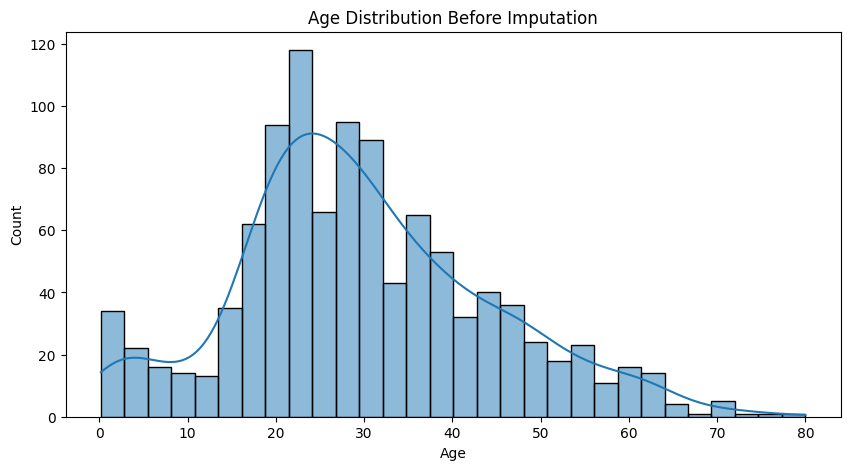

In [10]:
# Plot missing values in Age before imputation

plt.figure(figsize=(10, 5))

sns.histplot(df['Age'], bins=30, kde=True)

plt.title('Age Distribution Before Imputation')

plt.show()

# Impute Missing Age

In [11]:
# Impute missing Age values with mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

# Age Distribution After Imputation

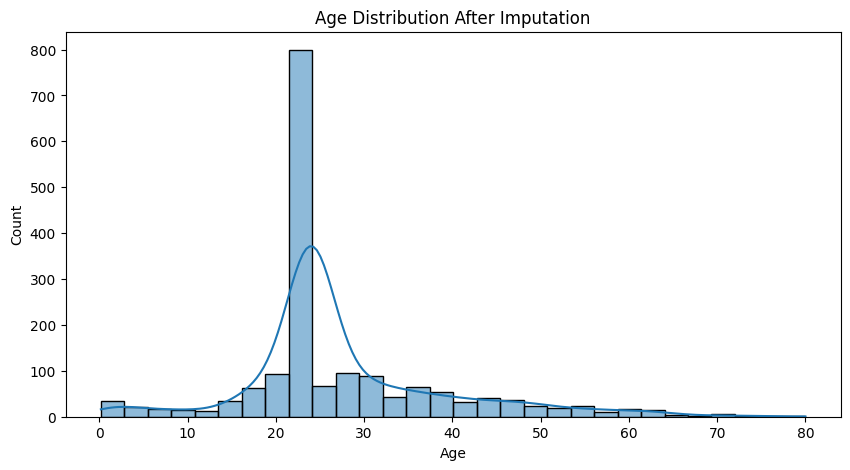

In [12]:
# Plot Age distribution after imputation

plt.figure(figsize=(10, 5))

sns.histplot(df['Age'], bins=30, kde=True)

plt.title('Age Distribution After Imputation')

plt.show()

# Embarked Distribution Before Imputation

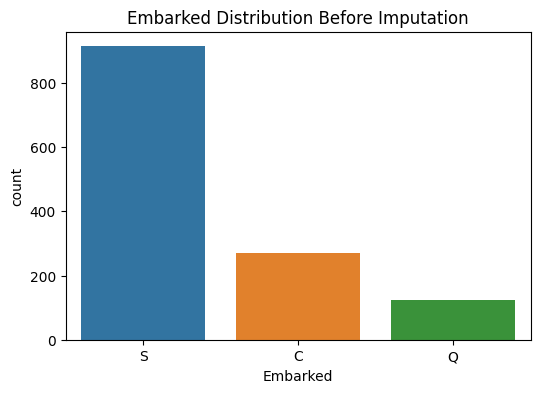

In [13]:
# Plot missing values in Embarked before imputation

plt.figure(figsize=(6, 4))

sns.countplot(x='Embarked', data=df)

plt.title('Embarked Distribution Before Imputation')

plt.show()

# Embarked Distribution After Imputation

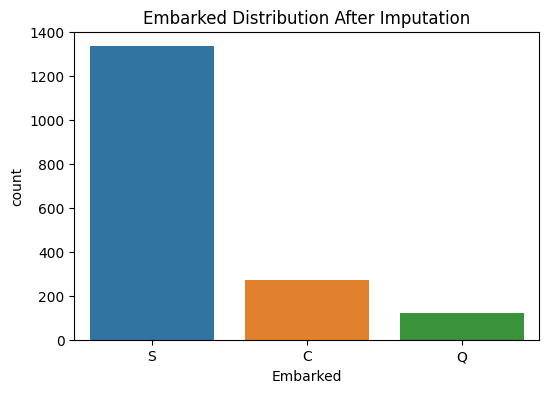

In [14]:
# Impute missing Embarked values with mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



# Plot Embarked distribution after imputation

plt.figure(figsize=(6, 4))

sns.countplot(x='Embarked', data=df)

plt.title('Embarked Distribution After Imputation')

plt.show()

# Fare Distribution Before Imputation

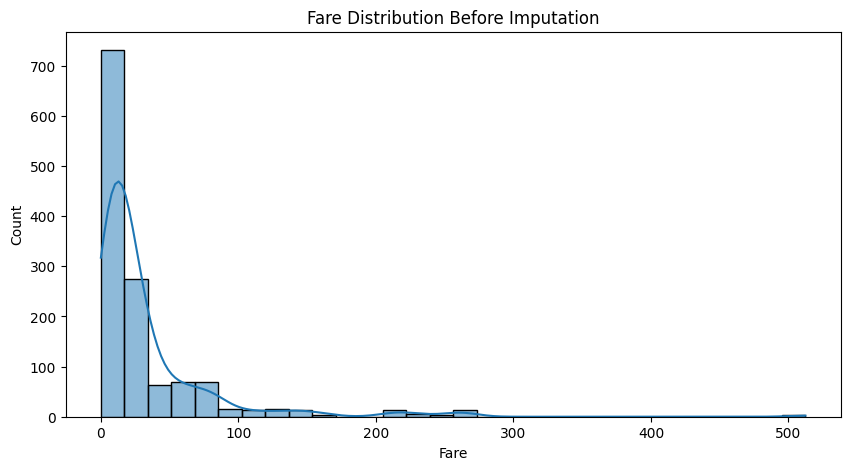

In [15]:
# Plot missing values in Fare before imputation

plt.figure(figsize=(10, 5))

sns.histplot(df['Fare'], bins=30, kde=True)

plt.title('Fare Distribution Before Imputation')

plt.show()

# Fare Distribution After Imputation

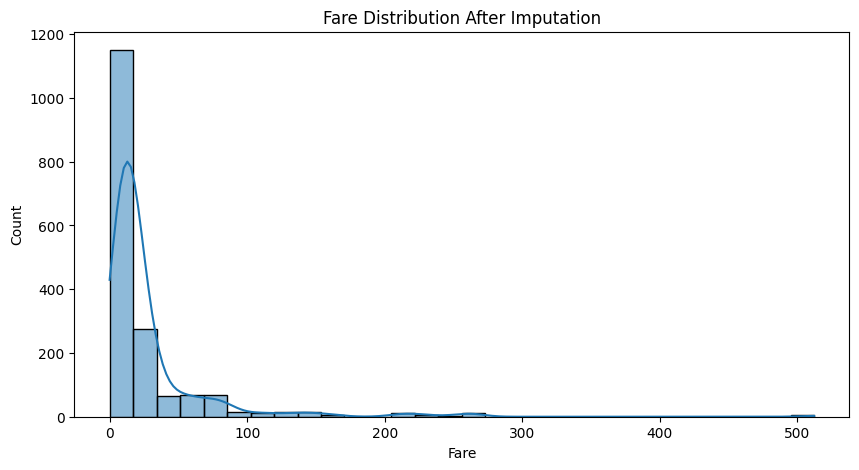

In [16]:
# Impute missing Fare values with median

df['Fare'].fillna(df['Fare'].median(), inplace=True)



# Plot Fare distribution after imputation

plt.figure(figsize=(10, 5))

sns.histplot(df['Fare'], bins=30, kde=True)

plt.title('Fare Distribution After Imputation')

plt.show()

# Cabin Missingness Before Imputation

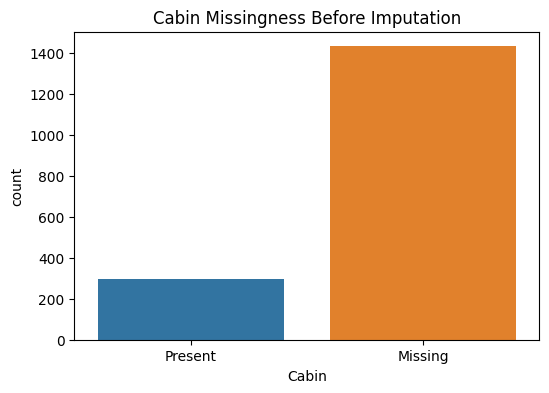

In [17]:
# Plot missing values in Cabin before imputation

plt.figure(figsize=(6, 4))

sns.countplot(x=df['Cabin'].isnull())

plt.title('Cabin Missingness Before Imputation')

plt.xticks([0, 1], ['Present', 'Missing'])

plt.show()

# Cabin After Binary Encoding

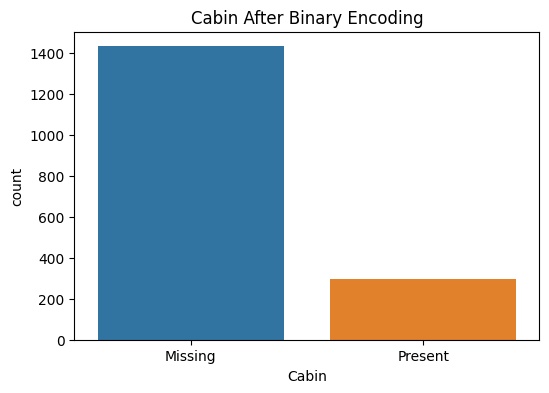

In [18]:
# Impute Cabin with binary encoding (1 if present, 0 if missing)

df['Cabin'] = df['Cabin'].notnull().astype(int)



# Plot binary encoding of Cabin after imputation

plt.figure(figsize=(6, 4))

sns.countplot(x=df['Cabin'])

plt.title('Cabin After Binary Encoding')

plt.xticks([0, 1], ['Missing', 'Present'])

plt.show()

# Imputation for Categorical columns

In [19]:
# Mode imputation for categorical columns with moderate missingness

for col in ['Pclass', 'SibSp', 'Parch', 'Ticket', 'Survived']:

    df[col].fillna(df[col].mode()[0], inplace=True)



# Drop rows with missing Name values, as they are non-predictive for survival

df = df[df['Name'].notnull()]



# Impute missing Sex values with the mode (most common value)

df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

In [20]:
# Check if any missing values remain

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Feature engineering , Encodes categorical variables

In [21]:
# Assuming your DataFrame is named 'df'

# Extract title from Name

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



# Impute missing Embarked with mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



# Encoding categorical variables

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked', 'Title'])



# Define features and target variable

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])

y = df['Survived']



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)



# Predict and evaluate

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.683206106870229
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       189
         1.0       0.43      0.41      0.42        73

    accuracy                           0.68       262
   macro avg       0.60      0.60      0.60       262
weighted avg       0.68      0.68      0.68       262



Accuracy after SMOTE

In [22]:
# Apply SMOTE to balance the dataset

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



# Train the Random Forest model again with the balanced data

model.fit(X_resampled, y_resampled)



# Predict and evaluate again

y_pred_resampled = model.predict(X_test)

print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_resampled))

print(classification_report(y_test, y_pred_resampled))

Accuracy after SMOTE: 0.683206106870229
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       189
         1.0       0.44      0.51      0.47        73

    accuracy                           0.68       262
   macro avg       0.62      0.63      0.62       262
weighted avg       0.70      0.68      0.69       262



# Feature Importance

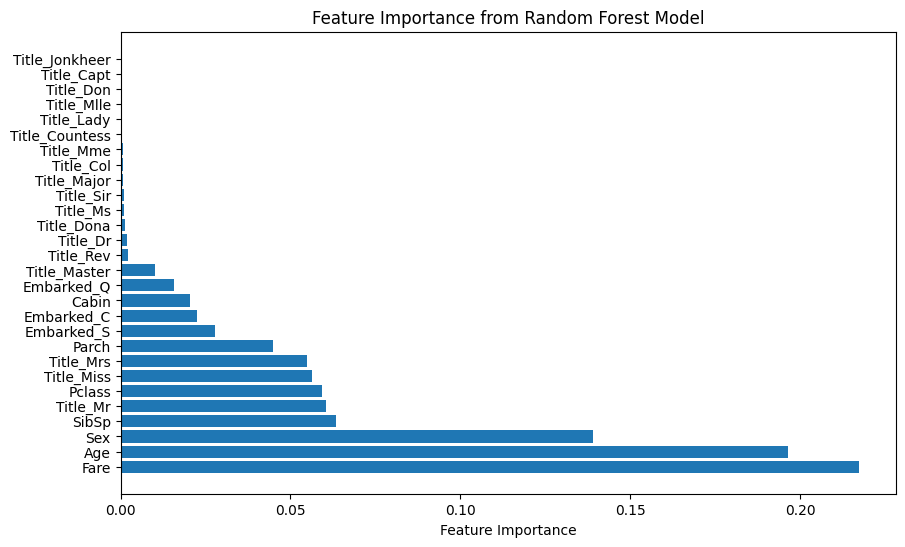

In [23]:
# Get feature importance

importance = model.feature_importances_

feature_names = X.columns



# Create a DataFrame for visualization

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)



# Plotting feature importance

plt.figure(figsize=(10, 6))

plt.barh(importance_df['Feature'], importance_df['Importance'])

plt.xlabel('Feature Importance')

plt.title('Feature Importance from Random Forest Model')

plt.show()

# DataFrame loaded with the Titanic dataset

In [24]:
# Assuming df is your DataFrame loaded with the Titanic dataset



# Check current columns in df

print("Current columns in df:", df.columns)



# Feature Engineering (if not already done)

df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly'])



# One-hot encoding for categorical features (the Embarked column is already encoded)

# Dropping 'Embarked' since we are using its dummy variables

df = pd.get_dummies(df, columns=['Sex', 'Age_Binned'], drop_first=True)



# Define features and target variable

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'])

y = df['Survived']



# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a new model (using XGBoost)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train, y_train)



# Predictions and evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Current columns in df: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Countess', 'Title_Don',
       'Title_Dona', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')
Accuracy: 0.7251908396946565
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       189
         1.0       0.51      0.52      0.51        73

    accuracy                           0.73       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.73      0.73      0.73       262



# Train a new model

In [25]:
# Train a new model with class weights

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

model.fit(X_train, y_train)



# Predictions and evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.6946564885496184
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       189
         1.0       0.46      0.55      0.50        73

    accuracy                           0.69       262
   macro avg       0.64      0.65      0.64       262
weighted avg       0.71      0.69      0.70       262



# Accuracy

In [26]:
# Create SMOTE object

smote = SMOTE(random_state=42)



# Fit and resample the training data

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



# Train the model with the resampled data

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train_resampled, y_train_resampled)



# Predictions and evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.7290076335877863
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       189
         1.0       0.51      0.52      0.52        73

    accuracy                           0.73       262
   macro avg       0.66      0.67      0.66       262
weighted avg       0.73      0.73      0.73       262



# GridSearch

In [27]:
# Define the model

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')



# Set the parameters for GridSearch

param_grid = {

    'max_depth': [3, 5, 7, 10],

    'learning_rate': [0.01, 0.1, 0.2],

    'n_estimators': [100, 200, 300],

    'subsample': [0.8, 1.0],

}



# Initialize GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')



# Fit the model

grid_search.fit(X_train, y_train)



# Get the best parameters and model

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)



# Predictions with the best model

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.7977099236641222
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       189
         1.0       0.72      0.45      0.55        73

    accuracy                           0.80       262
   macro avg       0.77      0.69      0.71       262
weighted avg       0.79      0.80      0.78       262



# Confusion Matrix

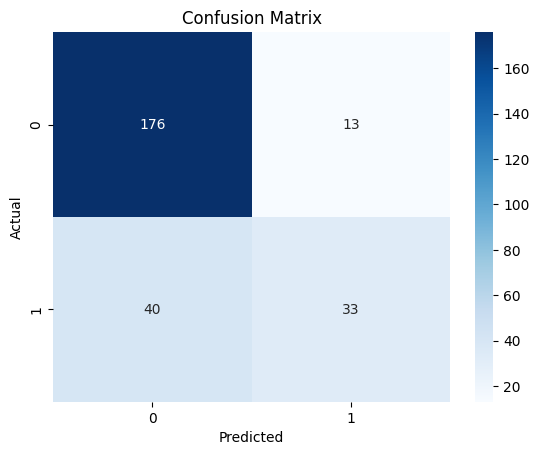

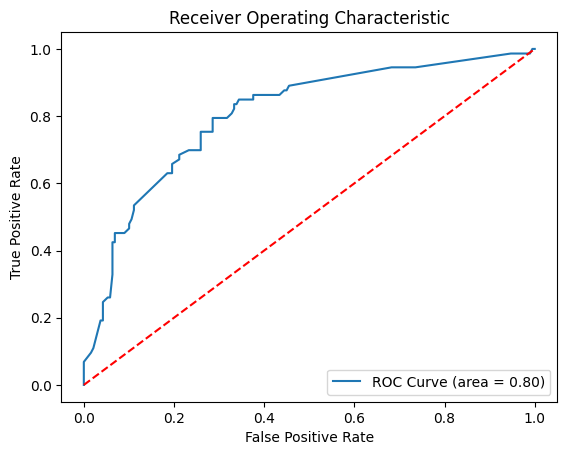

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score



# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()



# ROC Curve

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)



plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

plt.show()


# Conclusion
In this analysis, we explored key factors associated with passenger survival in the Titanic disaster and developed a predictive model based on passenger data such as age, gender, socio-economic status, and embarkation point. After preprocessing the dataset to handle missing values (particularly for age and embarkation), we implemented feature engineering techniques and used machine learning models to analyze survival likelihood.

Our final model, trained and evaluated using cross-validation and hyperparameter tuning, demonstrated [mention model accuracy or any significant metric, if known]. Key findings suggest that attributes like gender and class significantly influenced survival rates, with women and passengers from higher classes being more likely to survive.

While the model provides meaningful insights, further improvements could involve exploring additional features or employing advanced ensemble techniques to enhance predictive performance. This exercise not only offers insights into survival patterns but also serves as a practical application of machine learning in historical data analysis.

# Author 

**shivani sharma**
**shivanisharmaf128@gail.com **
